In [124]:
# Add modules to the path
import sys
sys.path.insert(0, '/home/hernandom/GitHub/')

In [125]:
%load_ext autoreload
%autoreload 2
import matplotlib.pylab as plt
import numpy as np
import math
import sys
import os
import pandas as pd
import neo

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
# 1. read data
GeneralDataDir = '/home/hernandom/data/Ephys_data/invitro/'
Experiment = '200204_006.wcp'

# create a reader
reader = neo.io.WinWcpIO(filename=GeneralDataDir + Experiment)
# read the blocks
blks = reader.read(lazy=False)
print(blks)

the default signal_group_mode will change from 'split-all' to 'group-by-same-units' in next release


In [37]:
reader.read_analogsignal

<bound method BaseIO.read_analogsignal of WinWcpIO: /home/hernandom/data/Ephys_data/invitro/200204_006.wcp
nb_block: 1
nb_segment:  [20]
signal_channels: [Vm0, Im0]
unit_channels: []
event_channels: []
>

In [38]:
blks[0].size

{'segments': 20, 'channel_indexes': 2}

In [40]:
blks[0].segments

[Segment with 2 analogsignals
 # analogsignals (N=2)
 0: AnalogSignal with 1 channels of length 12544; units mV; datatype float32 
    name: 'Vm0'
    annotations: {'channel_id': 0}
    sampling rate: 50025.01122996166 Hz
    time: 0.0 s to 0.2507545663975179 s
 1: AnalogSignal with 1 channels of length 12544; units pA; datatype float32 
    name: 'Im0'
    annotations: {'channel_id': 1}
    sampling rate: 50025.01122996166 Hz
    time: 0.0 s to 0.2507545663975179 s,
 Segment with 2 analogsignals
 # analogsignals (N=2)
 0: AnalogSignal with 1 channels of length 12544; units mV; datatype float32 
    name: 'Vm0'
    annotations: {'channel_id': 0}
    sampling rate: 50025.01122996166 Hz
    time: 0.0 s to 0.2507545663975179 s
 1: AnalogSignal with 1 channels of length 12544; units pA; datatype float32 
    name: 'Im0'
    annotations: {'channel_id': 1}
    sampling rate: 50025.01122996166 Hz
    time: 0.0 s to 0.2507545663975179 s,
 Segment with 2 analogsignals
 # analogsignals (N=2)
 0:

In [97]:
blks[0].segments[0].analogsignals[0].sampling_rate.item()

50025.01122996166

In [49]:
#make sure channel 0 is the voltage
blks[0].segments[0].analogsignals[0]

AnalogSignal with 1 channels of length 12544; units mV; datatype float32 
name: 'Vm0'
annotations: {'channel_id': 0}
sampling rate: 50025.01122996166 Hz
time: 0.0 s to 0.2507545663975179 s

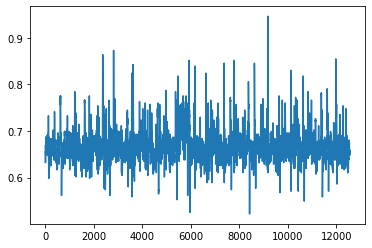

In [48]:
plt.plot(blks[0].segments[0].analogsignals[0].flat)

In [141]:
# Calculate the average of all segments
number_of_segments = blks[0].size['segments']
analog_signal = [np.array([y for y in blks[0].segments[x].analogsignals[0].flat])
                 for x in range(number_of_segments)]

average_signal = np.mean(analog_signal, axis = 0)

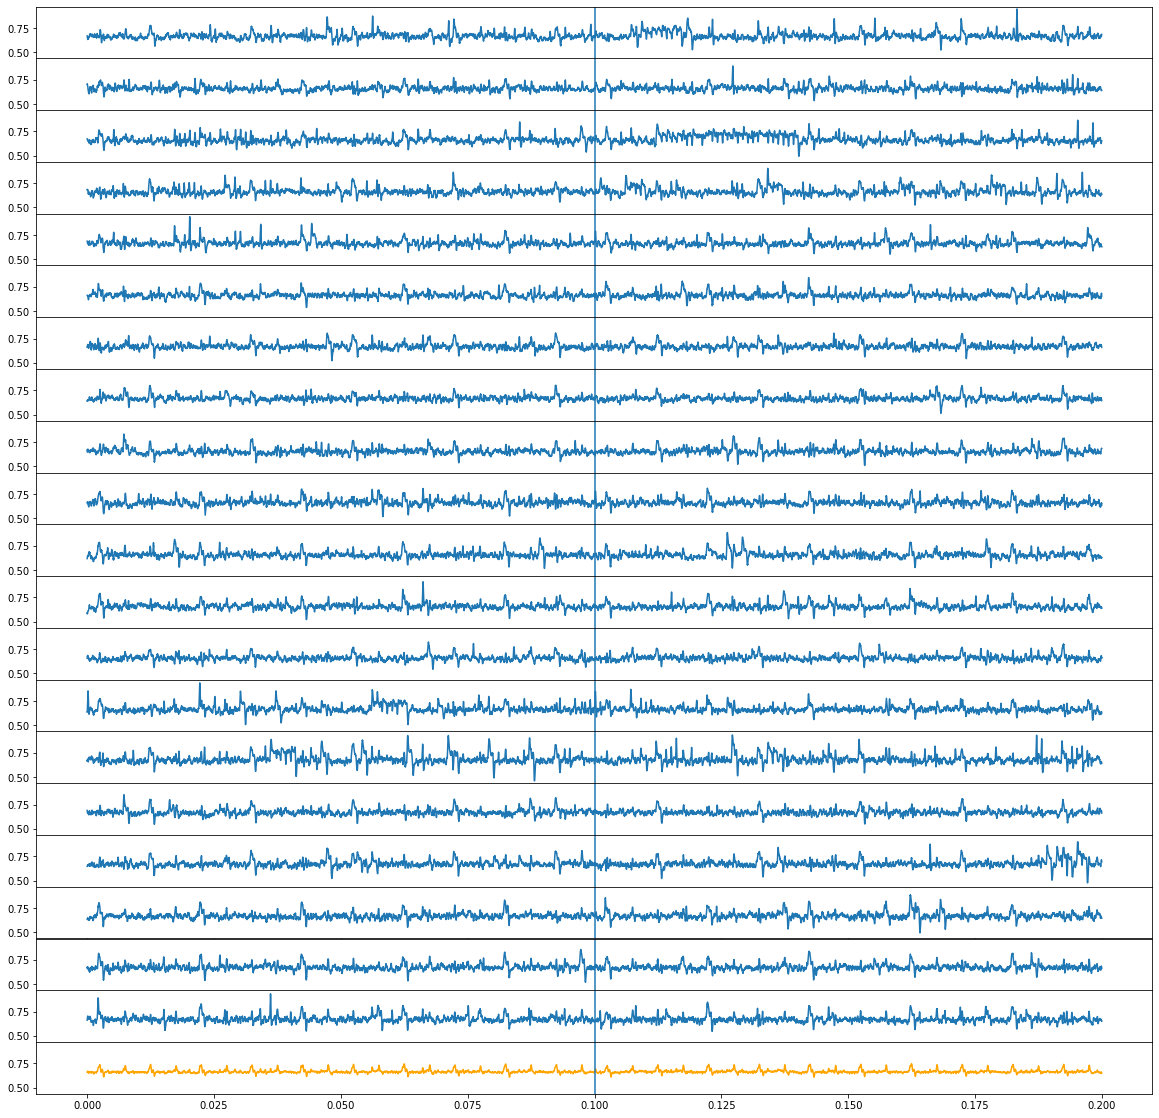

In [143]:
sampling_rate = blks[0].segments[0].analogsignals[0].sampling_rate.item()
times = np.array([x for x in range(len(analog_signal[0]))])/sampling_rate
window = [0.0, 0.2] # in seconds
PlotX = range(int(window[0] * sampling_rate), int(window[1] * sampling_rate)) #200ms

fig, axs = plt.subplots(number_of_segments + 1, 1, figsize=(20, 20) , facecolor='w', edgecolor='k',
                        sharey=True, sharex=True)
fig.subplots_adjust(hspace = .001, wspace=.001)
axs = axs.ravel()
for i in range(number_of_segments):
    axs[i].plot(times[PlotX], analog_signal[i][PlotX])
    #axs[i].text(.5,.9,"Channel Idx "+str(i), horizontalalignment='center', transform=axs[i].transAxes)
    axs[i].axvline(0.1)
    #print(i)
axs[i+1].plot(times[PlotX], average_signal[PlotX], color = 'orange')
axs[i+1].axvline(0.1)
plt.show()

In [140]:
np.array(analog_signal[i])[PlotX]

array([0.6866665, 0.6897183, 0.6927702, ..., 0.6256294, 0.6317331,
       0.634785 ], dtype=float32)